# Aula 1: Conhecendo a base de dados

In [ ]:
import pandas as pd

103) Importe o arquivo alunos.csv e armazene seu conteúdo em um DataFrame Pandas.

In [ ]:
dados = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv')
type(dados)

pandas.core.frame.DataFrame

104) Visualize as primeiras 7 linhas do DataFrame e as 5 últimas.

In [ ]:
dados.head(7)

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,NaN,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,NaN,False
6,Dara,21,7.0,True


In [ ]:
dados.tail(5)

,Nome,Idade,Notas,Aprovado
13,Mirla,25,9.0,True
14,Paulo,37,NaN,False
15,Mylena,29,7.0,True
16,Lucas,33,NaN,False
17,Nadia,34,8.0,True


105) Confira a quantidade de linhas e colunas desse DataFrame.

In [ ]:
dados.shape

(18, 4)

106) Explore as colunas do DataFrame e analise os tipos dos dados presentes em cada coluna.

In [ ]:
dados.columns

Index(['Nome', 'Idade', 'Notas', 'Aprovado'], dtype='object')

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Nome      18 non-null     object 
 1   Idade     18 non-null     int64  
 2   Notas     12 non-null     float64
 3   Aprovado  18 non-null     bool   
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 578.0+ bytes


In [ ]:
dados.dtypes

Nome         object
Idade         int64
Notas       float64
Aprovado       bool
dtype: object

In [ ]:
dados['Nome']

0           Ary
1           Ana
2         Cátia
3         Denis
4          Beto
5         Bruna
6          Dara
7        Carlos
8         Alice
9         Vitor
10       Daniel
11         Igor
12    Sthefanie
13        Mirla
14        Paulo
15       Mylena
16        Lucas
17        Nadia
Name: Nome, dtype: object

107) Calcule algumas estatísticas descritivas básicas dos dados do DataFrame (média, desvio padrão, etc). Dica: pesquise pelo método describe.

In [ ]:
descricao = dados.describe()
descricao

,Idade,Notas
count,18.000000,12.000000
mean,25.500000,6.800000
std,6.070662,2.204953
min,18.000000,2.500000
25%,21.000000,5.450000
50%,24.500000,7.000000
75%,28.750000,8.250000
max,37.000000,10.000000


# Aula 2: Análise Exploratória dos dados

In [ ]:
url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv'
pd.read_csv(url,delimiter=';')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN


108) Calcule a média de quartos por apartamento

In [ ]:
# Lendo
dados = pd.read_csv(url,delimiter=';')

# Selecionando apenas os de 'Tipo' Apartamento
df_apartamento = dados.query('Tipo == "Apartamento"')
df_apartamento

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32951,Apartamento,Vila Valqueire,2,0,0,52,1000.0,550.0,NaN
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [ ]:
# Média:
df_apartamento['Quartos'].mean()

2.481568707761622

109) Conferir quantos bairros únicos existem na nossa base de dados;

In [ ]:
df_bairros = dados['Bairro']
df_bairros.unique()

array(['Copacabana', 'Jardim Botânico', 'Barra da Tijuca', 'Centro',
       'Higienópolis', 'Vista Alegre', 'Cachambi', 'Ramos', 'Grajaú',
       'Lins de Vasconcelos', 'Botafogo', 'Taquara',
       'Freguesia (Jacarepaguá)', 'Tijuca', 'Olaria', 'Leblon',
       'São Cristóvão', 'Ipanema', 'Campo Grande',
       'Recreio dos Bandeirantes', 'Jardim Oceânico', 'Humaitá',
       'Península', 'Méier', 'Vargem Pequena', 'Maracanã', 'Jacarepaguá',
       'Vargem Grande', 'São Conrado', 'Maria da Graça', 'Vila Valqueire',
       'Gávea', 'Cosme Velho', 'Bonsucesso', 'Todos os Santos',
       'Laranjeiras', 'Itanhangá', 'Flamengo', 'Praça Seca', 'Piedade',
       'Lagoa', 'Santo Cristo', 'Largo do Machado', 'Catete',
       'Jardim Carioca', 'Benfica', 'Glória', 'Vila Isabel',
       'Quintino Bocaiúva', 'São Francisco Xavier', 'Rocha Miranda',
       'Engenho Novo', 'Engenho de Dentro', 'Cidade Nova', 'Pilares',
       'Arpoador', 'Tomás Coelho', 'Água Santa', 'Ilha do Governador',
       'Ja

110) Analisar quais bairros possuem a média de valor de aluguel mais elevadas;

In [ ]:
df_bairros_agrupados = dados.groupby(['Bairro'])[['Valor']].mean().sort_values('Valor',ascending=False)
df_bairros_agrupados

,Valor
Bairro,
Jacarepaguá,314143.489637
Irajá,154610.470588
Caju,120264.782609
Vasco da Gama,120000.000000
Cidade Nova,88166.692308
...,...
Inhoaíba,738.888889
Turiaçu,733.333333
Magalhães Bastos,726.666667


111) Criar um gráfico de barras horizontais que apresente os 5 bairros com as médias de valores de aluguel mais elevadas.

In [ ]:
cinco_bairros = df_bairros_agrupados.head(5)
cinco_bairros

,Valor
Bairro,
Jacarepaguá,314143.489637
Irajá,154610.470588
Caju,120264.782609
Vasco da Gama,120000.000000
Cidade Nova,88166.692308


<Axes: title={'center': 'Cinco bairros com as médias de aluguel mais elevadas'}, xlabel='Valor', ylabel='Bairro'>

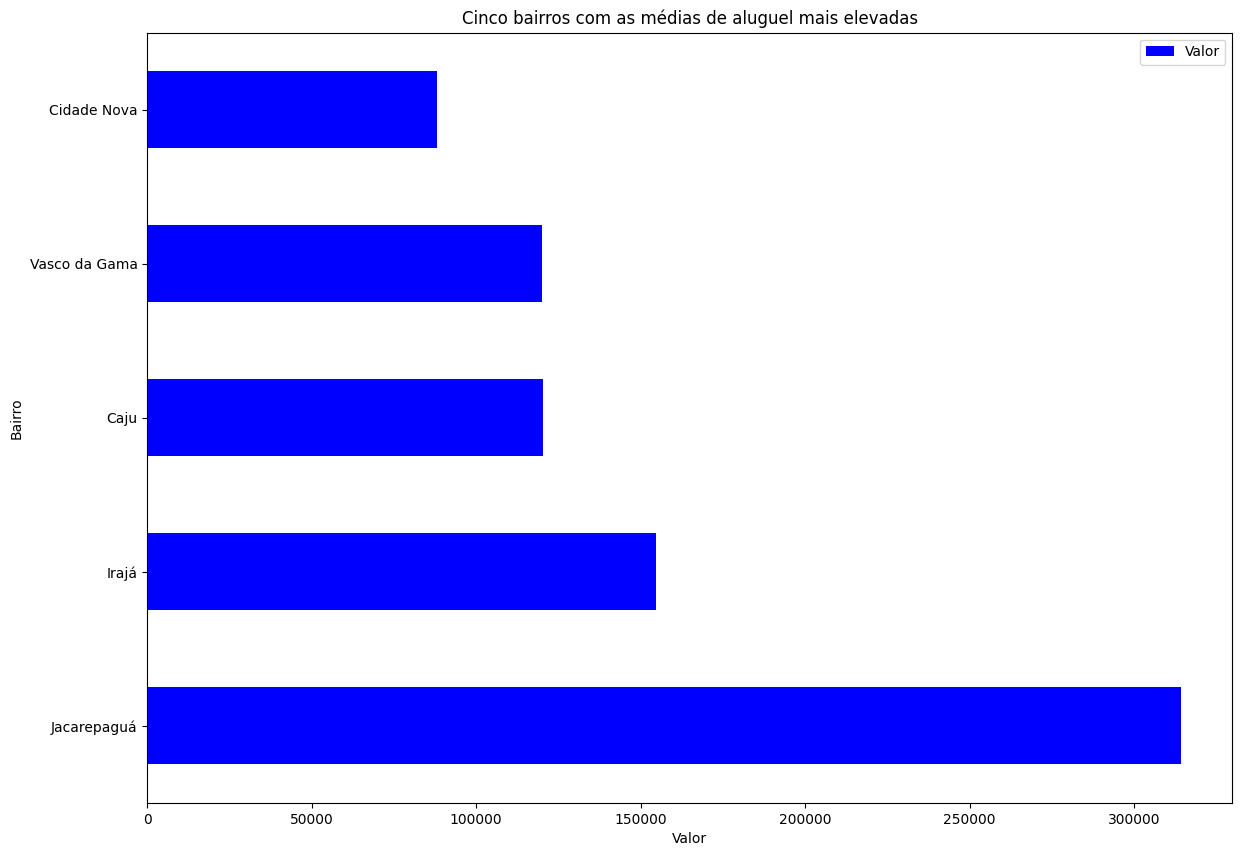

In [ ]:
import matplotlib.pyplot as plt
cinco_bairros.plot(kind='barh',figsize=(14,10),color='blue', xlabel='Valor',title='Cinco bairros com as médias de aluguel mais elevadas')

# Aula 3:
112) Durante o desenvolvimento do nosso projeto, nós aplicamos alguns filtros na nossa base de dados e salvamos os DataFrames resultantes em diferentes variáveis, sendo elas: df_1 e df_2.

Com base nisso, salve esses DataFrames em 2 arquivos csv distintos para que o time de ML possa ter acesso a esses dados de forma mais prática.

In [ ]:
# Tratando valores nulos e removendo registros
df = dados.query('Tipo == "Apartamento"').fillna(0)
registros_a_remover = df.query('Valor == 0 or Condominio == 0').index
df = df.drop(registros_a_remover,axis=0)

In [ ]:
# Apts com 1 quarto:
selecao1 = df['Quartos'] == 1

In [ ]:
# Apts com valores menores que 1200:
selecao2 = df['Valor'] < 1200

In [ ]:
# Unindo e criando novas seleções
selecao3 = (selecao1) & (selecao2)
selecao4 = (df['Quartos'] >= 2) & (df['Valor'] < 3000) & (df['Area'] > 70)

# Armazenando em dfs
df1 = df[selecao3]
df2 = df[selecao4]

In [ ]:
# Salvando para csv com delimitador ';' e index = False
df1.to_csv('df1', sep=';', index=False)
df2.to_csv('df2', sep=';', index=False)

## Hora da prática:

In [116]:
url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv'
df_alunos = pd.read_csv(url)

114) Verifique se a base de dados possui dados nulos e, caso tenha, realize o tratamento desses dados nulos da forma que achar mais coerente com a situação.

In [117]:
# Verificando a existência de valores nulos por colunas
df_alunos.isnull().sum()

# Tratamento
df_alunos = df_alunos.fillna(0).replace(7,8)
df_alunos

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,0.0,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,0.0,False
6,Dara,21,8.0,True
7,Carlos,19,6.0,True
8,Alice,35,5.6,False
9,Vitor,28,0.0,False


115) Os alunos "Alice" e "Carlos", não fazem mais parte da turma. Sendo assim, remova-os da base de dados.

In [118]:
alunos_a_serem_retirados = df_alunos.query('Nome == "Alice" or Nome == "Carlos"').index
df_alunos.drop(alunos_a_serem_retirados,axis=0,inplace=True)
df_alunos

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,0.0,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,0.0,False
6,Dara,21,8.0,True
9,Vitor,28,0.0,False
10,Daniel,21,0.0,False
11,Igor,24,4.5,False


116) Aplique um filtro que selecione apenas os alunos que foram aprovados.

In [119]:
selecao = df_alunos['Aprovado'] == True
df_aprovados = df_alunos[selecao]

117) Salve o DataFrame que possui apenas os alunos aprovados em um arquivo csv chamado "alunos_aprovados.csv".

In [120]:
df_aprovados.to_csv('alunos_aprovados.csv',index=False)

# Aula 4

118) Os alunos participaram de uma atividade extracurricular e ganharam pontos extras. Esses pontos extras correspondem a 40% da nota atual de cada um deles. Com base nisso, crie uma coluna chamada "Pontos_extras" que contenha os pontos extras de cada aluno, ou seja, 40% da nota atual deles.

In [121]:
df_alunos['Pontos_extras'] = df_alunos['Notas'].apply(lambda x: x * 0.4)
df_alunos.head()

,Nome,Idade,Notas,Aprovado,Pontos_extras
0,Ary,20,7.5,True,3.0
1,Ana,18,0.0,False,0.0
2,Cátia,27,2.5,False,1.0
3,Denis,18,5.0,False,2.0
4,Beto,21,10.0,True,4.0


119) Crie mais uma coluna, chamada "Notas_finais" que possua as notas de cada aluno somada com os pontos extras.

In [122]:
df_alunos['Notas_finais'] = df_alunos['Notas'] + df_alunos['Pontos_extras']
df_alunos

,Nome,Idade,Notas,Aprovado,Pontos_extras,Notas_finais
0,Ary,20,7.5,True,3.0,10.5
1,Ana,18,0.0,False,0.0,0.0
2,Cátia,27,2.5,False,1.0,3.5
3,Denis,18,5.0,False,2.0,7.0
4,Beto,21,10.0,True,4.0,14.0
5,Bruna,23,0.0,False,0.0,0.0
6,Dara,21,8.0,True,3.2,11.2
9,Vitor,28,0.0,False,0.0,0.0
10,Daniel,21,0.0,False,0.0,0.0
11,Igor,24,4.5,False,1.8,6.3


120) Como houve uma pontuação extra, alguns alunos que não tinham sido aprovados antes podem ter sido aprovados agora. Com base nisso, crie uma coluna chamada "Aprovado_final" com os seguintes valores:

- True: caso o aluno esteja aprovado (nota final deve ser maior ou igual a 6);
- False: caso o aluno esteja reprovado (nota final deve ser menor que 6).

In [123]:
df_alunos['Aprovado_final'] = df_alunos['Notas_finais'].apply(lambda x: True if x >= 6 else False)
df_alunos

,Nome,Idade,Notas,Aprovado,Pontos_extras,Notas_finais,Aprovado_final
0,Ary,20,7.5,True,3.0,10.5,True
1,Ana,18,0.0,False,0.0,0.0,False
2,Cátia,27,2.5,False,1.0,3.5,False
3,Denis,18,5.0,False,2.0,7.0,True
4,Beto,21,10.0,True,4.0,14.0,True
5,Bruna,23,0.0,False,0.0,0.0,False
6,Dara,21,8.0,True,3.2,11.2,True
9,Vitor,28,0.0,False,0.0,0.0,False
10,Daniel,21,0.0,False,0.0,0.0,False
11,Igor,24,4.5,False,1.8,6.3,True


121) Faça uma seleção e verifique quais alunos não tinham sido aprovados anteriormente, mas foram aprovados após a soma dos pontos extras.

In [125]:
# Método 1
selecao = (df_alunos['Aprovado'] == False) & (df_alunos['Aprovado_final'] == True)
df_alunos[selecao]

# Método query
df_alunos.query('Aprovado == False & Aprovado_final == True')

,Nome,Idade,Notas,Aprovado,Pontos_extras,Notas_finais,Aprovado_final
3,Denis,18,5.0,False,2.0,7.0,True
11,Igor,24,4.5,False,1.8,6.3,True
